# 03 - Spatial image filtering: convolutions

In [36]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt

 Image filtering considers a neighbourhood around the pixel to be processed, i.e. a region of pixels centred at coordinate $(x,y)$
. Therefore, it produces a combination of neighbour pixels. When this combination is linear, we can write this transformation by means of a convolution operator.

The convolution operator is formally written with the star operator *, allowing to differentiate it from a simple pixel-wise product. In terms of the whole image, it is given by: $$ g=w*f $$

The equation above means the filtered (processed) image $g$ is obtained by a convolution of a processing element $w$ (that defines the transformation) with the input image  $f$. Note that now $w$ will guide the way the transformation occurs. This processing element is called filter and it is organized as an array of weights.

The convolution evaluated at some given coordinate $(x,y)$ filters a pixel of image $f$, producing a new pixel value, $$g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) \cdot f(x-s, y-t)$$

Note that for every value of $s$ and $t$ that indexes the filter $w(s,t)$, the convolution basically multiplies every value in $w$ with different positions around $f(x,y)$, using shifts defined by $s$ and $t$.

There's also the 2D Cross-correlation, in which shifts $s$ and $t$ are flipped: $$g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) \cdot f(x+s, y+t)$$

In [3]:
# Creating a random example with a 5x5 image
import random

np.random.seed(666)
f = np.random.randint(0, 7, [5,5])
print(f)

[[4 2 5 6 6]
 [6 1 6 4 5]
 [3 6 3 4 4]
 [6 1 0 6 0]
 [5 2 4 5 5]]


In [8]:
# Creating an arbitrary filter w with size 3x3 with sum = 1 to not increase brigthness
w = np.matrix([[1, 2, 0], [1, 4, 0], [0, 0, 0]]) / 8.0
print(w)

[[0.125 0.25  0.   ]
 [0.125 0.5   0.   ]
 [0.    0.    0.   ]]


In [10]:
# Flipped filter
wf = np.flip(np.flip(w,0), 1)
print(wf)

[[0.    0.    0.   ]
 [0.    0.5   0.125]
 [0.    0.25  0.125]]


In [11]:
#Compute output value g(1,2)
x = 1
y = 2

# Slice the matrix in the region needed for the filtering
# filter size 3x3, so x-1 to x+1 and y-1 to y+1
f[x-1:x+2, y-1:y+2]

array([[2, 5, 6],
       [1, 6, 4],
       [6, 3, 4]])

In [13]:
mult_1_2 = np.multiply(f[x-1:x+2, y-1:y+2], wf)
print(mult_1_2)

[[0.   0.   0.  ]
 [0.   3.   0.5 ]
 [0.   0.75 0.5 ]]


In [17]:
# Sum all multiplied values
g_1_2 = np.sum(mult_1_2)
print(g_1_2)
print(int(g_1_2))

4.75
4


In [33]:
# Function to perform a convolution at some pixel (x,y)
def conv_point(f, w, x, y, debug=False):
    # Compute the range of indices a and b
    n, m = w.shape
    a = int((n - 1) / 2.0)
    b = int((m - 1) / 2.0)

    # Get submatrix of a pixel neighgbourhood
    sub_f = f[x-a: x+a+1, y-b: y+b+1]

    # Flip the original filter
    w_flip = np.flip(np.flip(w, 0), 1)

    if (debug == True):
        print("sub-image f:\n" + str(sub_f))
        print("flipped filter:\n" + str(w_flip))

    value = np.sum(np.multiply(sub_f, w_flip))

    return int(value)

In [34]:
conv_point(f, w, 1, 2)

4

In [30]:
# Function to perform convolution on the whole image
def image_convolution(f, w, debug=False):
    # Compute the range of indices a and b
    n, m = w.shape
    a = int((n - 1) / 2.0)
    b = int((m - 1) / 2.0)

    # Size of the image
    N, M = f.shape

    # Create a new empty image to store the output values
    # but the border values will be zero
    # g = np.zeros(f.shape, dtype=np.uint8)

    # Or we can create a copy of the original image, and
    # the border values will remain the same
    g = np.array(f, copy=True)

    # Flip the original filter
    w_flip = np.flip(np.flip(w, 0), 1)

    # Loop through each pixel not considering the borders as defined by a,b
    for x in range(a, N-a):
        for y in range(b, M-b):
            # Get submatrix of a pixel neighgbourhood
            sub_f = f[x-a: x+a+1, y-b: y+b+1]
            g[x,y] = np.sum(np.multiply(sub_f, w_flip))

    return g.astype(np.uint8)

In [31]:
g = image_convolution(f, w)
g

array([[4, 2, 5, 6, 6],
       [6, 3, 4, 4, 5],
       [3, 3, 2, 4, 4],
       [6, 1, 2, 4, 0],
       [5, 2, 4, 5, 5]], dtype=uint8)

## Filtering images
Filters can be designed with different purposes. Let's see some examples

In [37]:
img1 = imageio.imread("pattern.png")
img2 = imageio.imread("gradient_noise.png")
img3 = imageio.imread("board.jpg")

In [39]:
# An average filter, producing a mean in regio 3x3 (symetric) considering all neighbours
w_mean = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0
print(w_mean)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


(-0.5, 319.5, 319.5, -0.5)

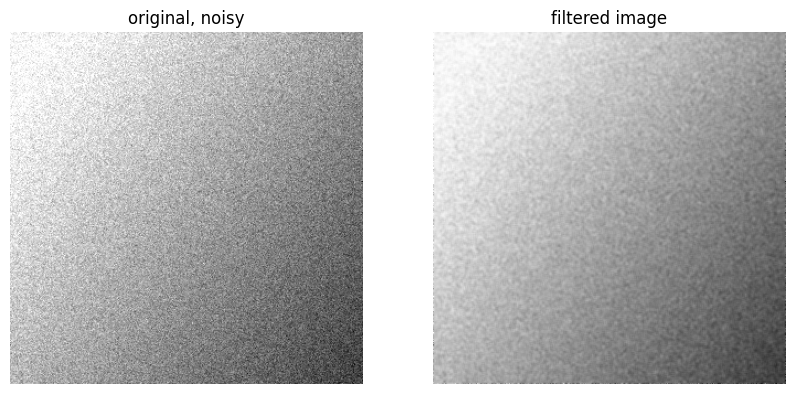

In [41]:
img2_mean = image_convolution(img2, w_mean)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("original, noisy")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_mean, cmap='gray', vmin=0, vmax=255)
plt.title("filtered image")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

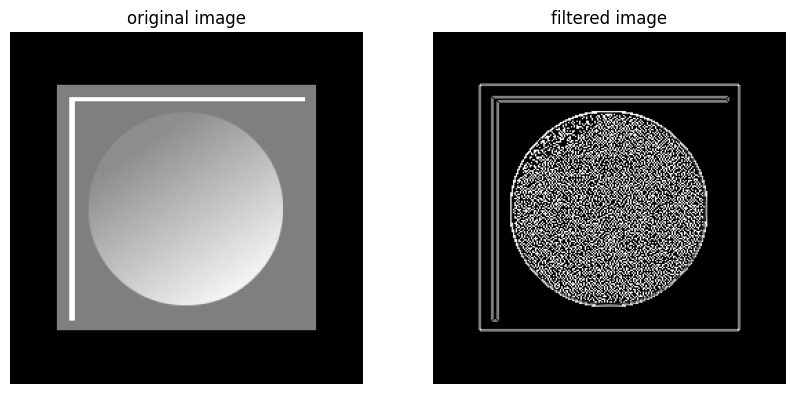

In [45]:
# Differential filter -> capture transitions

# Laplacian 3x3 filter
w_diff = np.matrix([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

img1_diff = image_convolution(img1, w_diff)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_diff, cmap='gray', vmin=0, vmax=255)
plt.title("filtered image")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

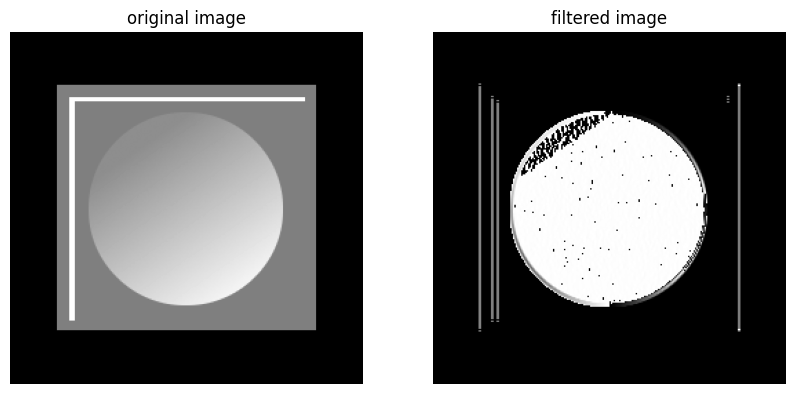

In [46]:
# Another differential filter, but directional (vertical)
w_vert = np.matrix([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

img1_vert = image_convolution(img1, w_vert)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_vert, cmap='gray', vmin=0, vmax=255)
plt.title("filtered image")
plt.axis('off')

In [50]:
# Using a random filter
w_rand = np.random.random([7,7])
w_rand = w_rand / np.sum(w_rand)
print(w_rand)

[[0.02585711 0.0378494  0.03649521 0.0286427  0.02280824 0.00015623
  0.03533888]
 [0.01581176 0.01848789 0.00891704 0.02784535 0.00833245 0.00575785
  0.03333965]
 [0.0150308  0.02294278 0.03885615 0.01976385 0.01051783 0.01452737
  0.01172736]
 [0.03510083 0.00244295 0.00571199 0.03619847 0.01587506 0.02506887
  0.03653318]
 [0.01969933 0.00938521 0.02469278 0.03153196 0.03297276 0.02579698
  0.02409629]
 [0.00359831 0.01797674 0.02781251 0.00535474 0.01209256 0.0034193
  0.00692026]
 [0.00659087 0.01695693 0.03121676 0.01958983 0.00069732 0.04377973
  0.03988158]]


(-0.5, 499.5, 464.5, -0.5)

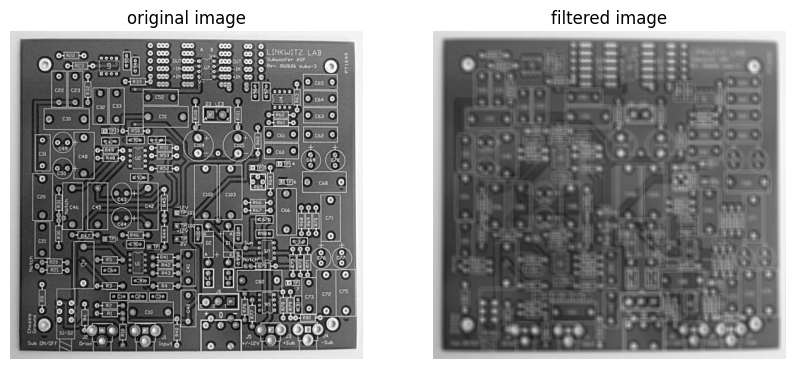

In [51]:
img3_rand = image_convolution(img3, w_rand)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_rand, cmap='gray', vmin=0, vmax=255)
plt.title("filtered image")
plt.axis('off')